<a href="https://colab.research.google.com/github/YirenShen-07/Yiren-590Assignment6/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #06
### The purpose of this project is to analyze and understand the impact of median_income and other features on the median house price (median_house_value). I used a variety of explanatory visualization techniques, including Partial Dependency Plots (PDP), Accumulated Local Effects (ALE), Individual Conditional Expectation (ICE), and Feature Importance Analysis, to explain the behavior and logic behind the model predictions through the analysis of the features.
### Yiren Shen

#### Include the button below. Change the link to the location in your github repository:


## DO:
* For a model and dataset of your choice, produce PDP, ICE, and ALE plots. Exploratory analysis of your dataset should be performed to determine the amount of correlation between features.  
* Provide a comprehensive explanation of your plots. Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.


In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-AI-XAI" # Change to your repo name
git_path = 'https://github.com/AIPI-590-XAI/Duke-AI-XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke-AI-XAI'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 68 (delta 22), reused 49 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 6.59 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Duke-AI-XAI/templates
template.ipynb


In [2]:
import csv
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset for this project is on house price forecasting:

In [3]:
data="/content/drive/MyDrive/houseprice.csv"
data=pd.read_csv(data)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-mn1gicqw/alepython_0808995fcef94e88851064b60421fc95
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-mn1gicqw/alepython_0808995fcef94e88851064b60421fc95
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=6a796d7b6a0a2ba0558547402860e045a764d6ba0e004495cf664ccc35e61f13
  Stored in directory: /tmp/pip-ephem-wheel-cache-1_xj01nb/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from alepython import ale_plot
from sklearn.inspection import permutation_importance

# Correlations

Calculate and visualize between numerical features in a dataset

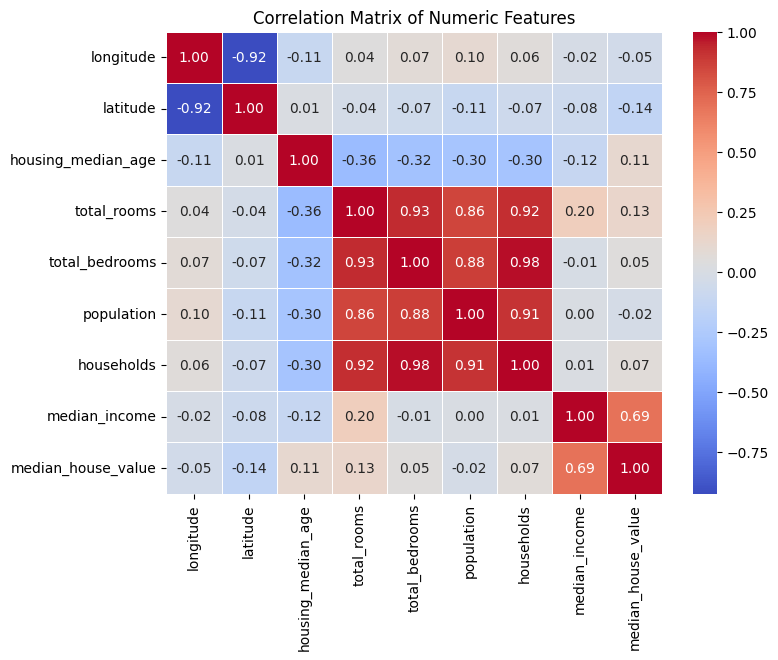

In [6]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()



*   There exists a significant positive correlation (0.93) between total_rooms and total_bedrooms, suggesting that the more rooms there are, the more bedrooms there will typically be in these houses.

*   The total_rooms, total_bedrooms, population, and household variables all tend to show very strong positive correlations with each other since they all bear a relation to the population and residential density of an area.

*   Most correlated (0.69) is median_income with median_house_value, which reflects a strong positive correlation between median_income and median_house_value. Normally, high-income areas have high median home values.
*   The high correlation between median_income and median_house_value is valuable information which indicates that the income level is an important predictor of housing values.





# Train a Random Forest Regression Model

Preprocess the data and train a random forest regression model for predicting 'median_house_value'

In [7]:
# Handle missing values in the 'total_bedrooms' column
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# One-hot encoding for the categorical variable 'ocean_proximity'
X = pd.get_dummies(data.drop('median_house_value', axis=1), drop_first=True)
y = data['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


<ipython-input-7-4a0d25036ed2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


RandomForestRegressor(random_state=42)

# Partial Dependence Plots (PDP)

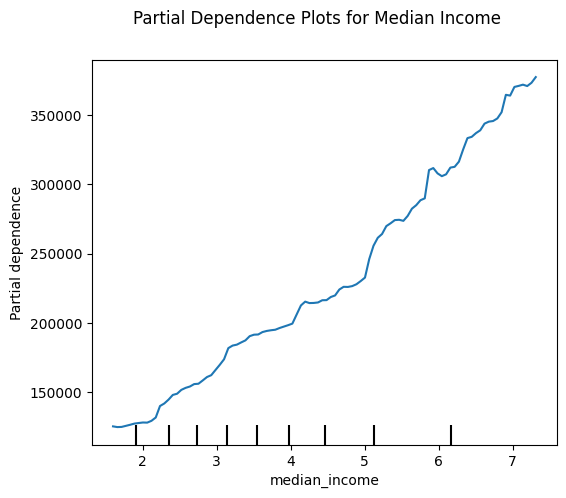

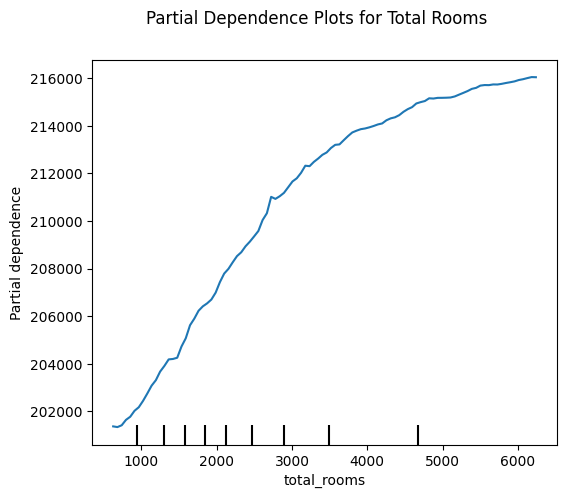

In [8]:
# Generate Partial Dependence Plots (PDP) for median_income
features = ['median_income']

fig, ax = plt.subplots(figsize=(6, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features, kind='average', ax=ax)
plt.suptitle('Partial Dependence Plots for Median Income')

features = ['total_rooms']

fig, ax = plt.subplots(figsize=(6, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features, kind='average', ax=ax)
plt.suptitle('Partial Dependence Plots for Total Rooms')

plt.show()


**Median Income:**

As can be seen from the figure, the median house price gradually increases as median income increases. Areas with higher incomes also have relatively higher house prices.
*   The curve in the Partial Dependence Plot (PDP) for median_income is non-linear and exhibits a positive (upward) slope.
*   The results are intuitive and consistent with reality, as house prices tend to be higher in more economically affluent regions.

**Total Rooms:**

The higher the total number of rooms, the higher the median home price, which is in line with realistic expectations, as bigger homes usually command higher prices.

*  There is a nonlinear and positive relationship between total_rooms and median_house_value


*   There is no obvious upper or lower limit, but the moderation of the curve suggests that after a certain point, continuing to increase the number of rooms has a very limited impact on the forecast. This behavior is consistent with reality, as housing prices in a given area can be affected not only by the total number of rooms, but also by other factors such as location, housing quality and amenities.

**Comparison:**

As can be seen in both graphs, median_income has a much more significant effect on house prices. As income increases, house prices show a strong upward trend and the slope is particularly steep in the middle and upper income ranges. This suggests that income is a strong influence on house prices.
total_rooms, while also influential, has a much more rapidly diminishing marginal effect. This suggests that after a certain value of total_rooms is reached, continued increases have a relatively limited effect on house prices.






# ICE Plots

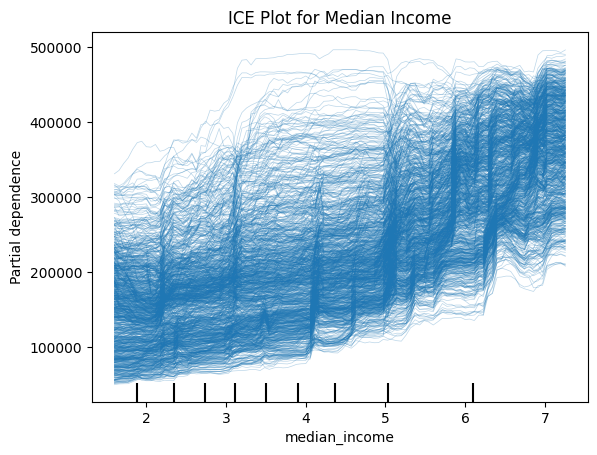

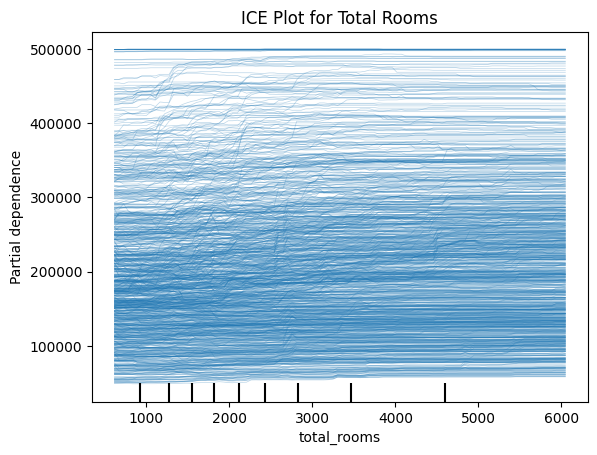

In [9]:
# Choose the feature of interest
features = ["median_income"]

# Display the ICE plot for median income and total rooms
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='individual') #kind='individual'
plt.title('ICE Plot for Median Income')

features = ["total_rooms"]
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='individual')
plt.title('ICE Plot for Total Rooms')

plt.show()

**Ice Plot for Median Income:**

*   The graph shows a nonlinear relationship, with the curve rising faster especially between middle incomes (about 3 and 5), indicating that incomes have the greatest impact on house price appreciation in this interval.
*   The different curves in the ICE graph show diversity between the samples, suggesting that the degree of price change may vary across houses for the same change in income because of the influence of other characteristics.

**Ice Plot for Total Rooms:**

* While there is a slight overall upward trend in the curve, the slope of the curve is very small, indicating that even with an increase in the number of rooms, the increase in house prices is very limited.
* The chart shows that the total number of rooms affects house prices, although the marginal effect rapidly fades away. It indicates that having more number of rooms will not lead to a substantial increase in house prices in the model prediction.

**Comparison:**

The effect of median_income on median_house_value is larger and more significant than that of total_rooms. In the first graph, the curves have a wider range of variation and a significant rise, suggesting that income is a very strong predictive feature. In the second graph, on the other hand, an increase in the total number of rooms has a relatively limited effect on the increase in house prices.





Text(0.5, 1.0, 'PDP and ICE for Median Income')

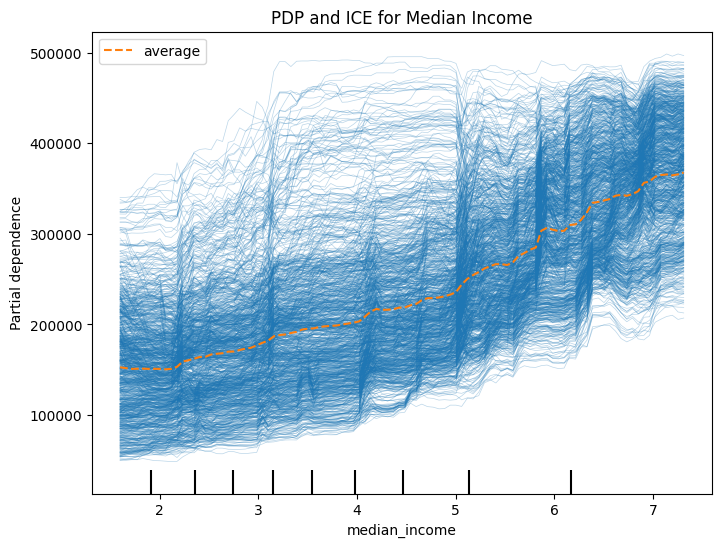

In [10]:
# Generate Partial Dependence Plot (PDP) and ICE for 'median_income'
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_train, ['median_income'], kind='both', ax=ax)
plt.title('PDP and ICE for Median Income')

**Combining PDP and ICE:**

The PDP (orange dashed line) shows the average predicted value for all samples for different median_income values. This line shows the overall trend between median_income and median_house_value.
The ICE (blue line) indicates the change in individual predicted values for each sample as median_income changes. These curves demonstrate the diversity of the samples, i.e., the differences in predicted values across houses for the same change in income.

# ALE plot

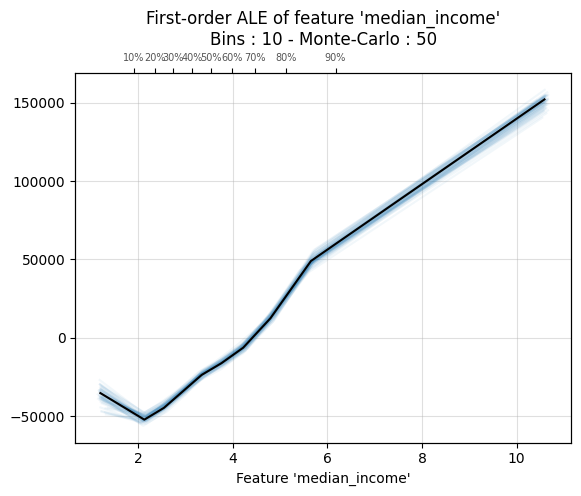

<Axes: title={'center': "First-order ALE of feature 'median_income'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'median_income'">

In [11]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(model, X_train, 'median_income', monte_carlo=True)

This figure shows a **First Order ALE (Accumulated Local Effects)** plot for the median_income (median_income) feature. The purpose of such a plot is to show the local effects of the feature on the target variable (median_house_value), revealing how changes in the value of the feature affect the target variable through cumulative effects.

The Y-axis of the ALE plot demonstrates the cumulative local effect, so that changes in the value of the feature accumulate across the trend of the curve at different income intervals. In this way, the graph provides a good picture of the local effects of eigenvalue changes on the target variable.

Centering makes the curve start from negative at lower median_income values (near 0) and gradually increase to positive values. This centering method helps us to understand the relative effects of features without the interference of specific absolute values.

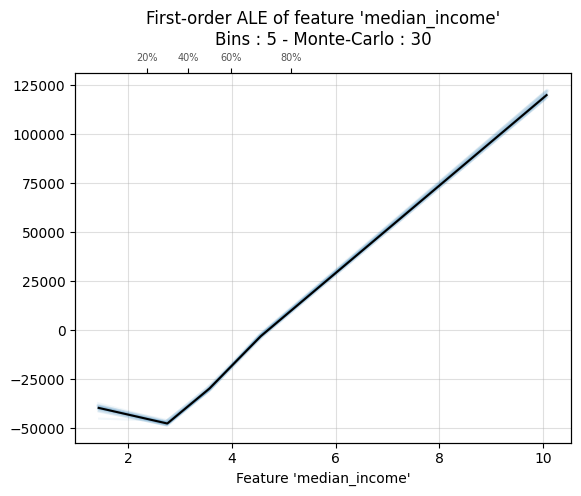

<Axes: title={'center': "First-order ALE of feature 'median_income'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'median_income'">

In [12]:
# Change hyperparameters for 1D Main Effect ALE Plot
ale_plot(
    model,
    X_train,
    "median_income",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

In order to simplify the computation and increase efficiency while still demonstrating the effect of the feature median_income on the target variable change the hyperparameters. Specifically, such changes help to maintain a basic understanding of feature effects while reducing computational complexity.

Even when reducing the number of bins and the number of Monte Carlo simulations, the second plot is still able to maintain a similar general trend to the first plot, i.e. a positive relationship between median_income and the target variable. This ensures that the basic understanding of the model's features is not significantly weakened while simplifying the calculations.

In [13]:
# Compute permutation importances
perm_imp = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

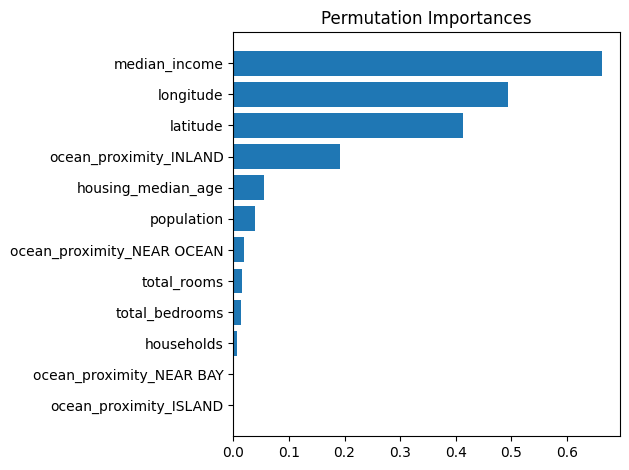

In [14]:
# Plot Permutation Feature Importances as a bar chart

sorted_idx = perm_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], perm_imp.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

The graph shows the ranked importance scores for each feature, with the X-axis indicating the importance score of the feature and the Y-axis listing the feature name

The results of this chart are reasonable and realistic. Income and location are the most important factors in real estate price forecasting, and these factors directly affect the value of a property. Additionally, information about proximity to the coast or inland areas can also significantly affect home prices.

# Differences between PDP and ALE plots and the impact of feature correlation exploration on results

By contrasting the PDP and ALE, there are marked differences in how these two plots account for feature correlations. PDP assumes that features are independent and can mislead when there is a correlation, like when median income fully explains geographic location (LONGITUDE and LATITUDE). So, the isolated influence of any of the correlated features, for instance, may not be well summarized by the PDP plot. ALE overtakes this shortcoming by correlating the features and calculating the local effects of the features, thus demonstrating the effects of the features on predictions more explicitly by earning the aggregated data over space. Exploratory analyses indicate that correlation brings about a dramatic change in interpreting results, thus making ALE a much more robust model than PDP in the presence of correlations among the features and giving a more realistic view of the feature-positive influence on the target outcome.

# Reference
1. AIPI-590-XAI. “Duke-Ai-Xai/Explainable-Ml-Example-Notebooks/Global_explanations.Ipynb at Main · AIPI-590-Xai/Duke-Ai-Xai.” GitHub, https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/global_explanations.ipynb Accessed 17 Oct. 2024.
2. AIPI-590-XAI. “Duke-Ai-Xai/Explainable-Ml-Example-Notebooks/Local_explanations.Ipynb at Main · AIPI-590-Xai/Duke-Ai-Xai.” GitHub,https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/local_explanations.ipynb Accessed 17 Oct. 2024.
3. Mohapatra, Shibu. “California House Price.” Kaggle, 27 Aug. 2022, www.kaggle.com/datasets/shibumohapatra/house-price.
4. Chatgpt. Explanation of Python code for models